In [2]:
import pandas as pd
import numpy as np
import sklearn as sk
import matplotlib as plt
import seaborn as sns


In [3]:
green = pd.read_csv(r"C:\Users\hp\Desktop\training\green_tech_data.csv")
green

,carbon_emissions,energy_output,renewability_index,cost_efficiency,sustainability
0,181.089042,128.286267,0.642032,0.732568,1
1,382.750007,672.769370,0.084140,2.891096,0
2,306.197880,382.920383,0.161629,2.932858,0
3,259.530469,557.713622,0.898554,3.368435,0
4,104.606524,916.809827,0.606429,3.767411,0
...,...,...,...,...,...
95,222.828459,414.288617,0.522243,4.688408,0
96,232.956490,753.360111,0.769994,4.362857,0
97,199.639356,907.399234,0.215821,2.430473,0
98,58.896694,898.377782,0.622890,3.878920,0


In [4]:
green.head()

,carbon_emissions,energy_output,renewability_index,cost_efficiency,sustainability
0,181.089042,128.286267,0.642032,0.732568,1
1,382.750007,672.769370,0.084140,2.891096,0
2,306.197880,382.920383,0.161629,2.932858,0
3,259.530469,557.713622,0.898554,3.368435,0
4,104.606524,916.809827,0.606429,3.767411,0


In [5]:
green.tail()

,carbon_emissions,energy_output,renewability_index,cost_efficiency,sustainability
95,222.828459,414.288617,0.522243,4.688408,0
96,232.956490,753.360111,0.769994,4.362857,0
97,199.639356,907.399234,0.215821,2.430473,0
98,58.896694,898.377782,0.622890,3.878920,0
99,87.761999,801.887991,0.085347,3.895443,0


In [6]:
green.isna().sum()

carbon_emissions      0
energy_output         0
renewability_index    0
cost_efficiency       0
sustainability        0
dtype: int64

In [7]:
green.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   carbon_emissions    100 non-null    float64
 1   energy_output       100 non-null    float64
 2   renewability_index  100 non-null    float64
 3   cost_efficiency     100 non-null    float64
 4   sustainability      100 non-null    int64  
dtypes: float64(4), int64(1)
memory usage: 4.0 KB


In [8]:
#identify features
x = green[["carbon_emissions","energy_output","renewability_index","cost_efficiency"]]
y = green["sustainability"]

In [9]:
from sklearn.model_selection import train_test_split

In [10]:
#split
x_train,x_test,y_train,y_test = train_test_split(x,y, test_size = 0.2 , random_state = 42)

In [25]:
x_test

,carbon_emissions,energy_output,renewability_index,cost_efficiency
83,72.245423,889.605418,0.093982,4.448624
53,363.189573,540.507484,0.316922,1.233205
70,320.285669,709.807926,0.809361,0.953501
45,281.882800,133.198253,0.928319,3.271325
44,140.572994,356.356445,0.015457,2.293271
39,204.053373,974.603874,0.177111,0.940254
22,152.250627,386.203127,0.093675,3.470888
80,352.086199,406.959716,0.890005,1.031742
10,57.204573,360.776308,0.548734,2.475371
0,181.089042,128.286267,0.642032,0.732568


In [26]:
y_test

83    0
53    0
70    0
45    0
44    0
39    0
22    0
80    0
10    1
0     1
18    0
30    0
73    0
33    0
90    0
4     0
76    0
77    1
12    0
31    0
Name: sustainability, dtype: int64

In [11]:
from sklearn.linear_model import LogisticRegression
lr_model = LogisticRegression()
lr_model.fit(x_train,y_train)

LogisticRegression()

In [12]:
y_pred = lr_model.predict(x_test)
y_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0],
      dtype=int64)

In [13]:
print(y_test)

83    0
53    0
70    0
45    0
44    0
39    0
22    0
80    0
10    1
0     1
18    0
30    0
73    0
33    0
90    0
4     0
76    0
77    1
12    0
31    0
Name: sustainability, dtype: int64


In [14]:
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score,recall_score
accuracy = accuracy_score(y_pred, y_test)
precision = precision_score(y_pred, y_test)
recall = recall_score(y_pred, y_test)
print("Accuracy",accuracy *100)
print("Precision",precision*100)
print("Recall",recall*100)

Accuracy 95.0
Precision 66.66666666666666
Recall 100.0


In [15]:
con = confusion_matrix(y_pred, y_test)
print(con)


[[17  1]
 [ 0  2]]


<Axes: >

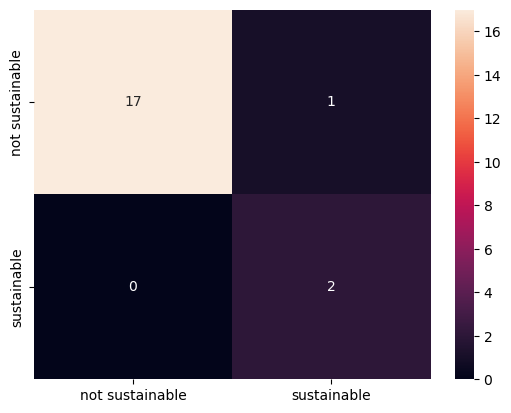

In [16]:
sns.heatmap(con,annot = True ,xticklabels = ["not sustainable","sustainable"],
            yticklabels = ["not sustainable","sustainable"])

In [17]:
from sklearn.metrics import classification_report
print(classification_report(y_pred,y_test,target_names = ["not sustainable","sustainable"]))

                 precision    recall  f1-score   support

not sustainable       1.00      0.94      0.97        18
    sustainable       0.67      1.00      0.80         2

       accuracy                           0.95        20
      macro avg       0.83      0.97      0.89        20
   weighted avg       0.97      0.95      0.95        20



In [18]:
green["sustainability"].value_counts()

sustainability
0    85
1    15
Name: count, dtype: int64

In [19]:
import joblib as jb

In [20]:
jb.dump(lr_model,"sustainability.pkl")

['sustainability.pkl']

In [21]:
my_sustainable_model = jb.load("sustainability.pkl")

In [22]:
green.columns

Index(['carbon_emissions', 'energy_output', 'renewability_index',
       'cost_efficiency', 'sustainability'],
      dtype='object')

In [23]:
ce = float(input("enter carbon emission : "))
eo = float(input("enter energy output : "))
ri = float(input("enter renuable index: "))
cf = float(input("enter cost effciency: "))
new_data = np.array([[ce,eo,ri,cf]])
prediction = my_sustainable_model.predict(new_data)
print(f"The Energy Source Is Sustainable :{prediction[0]} ")

enter carbon emission :  4180
enter energy output :  150
enter renuable index:  12
enter cost effciency:  102


The Energy Source Is Sustainable :0 


C:\Users\hp\Downloads\anacondaa\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
